# Lecture Recording and Files

<iframe width="560" height="315" src="https://www.youtube.com/embed/Re3Lricv7o4" title="CBW Introduction to R 2024 | 01: Getting To Know R" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
<!-- Copy the embed code from YouTube, right click, edit the width/height -->

*Below is the rendered and completed version of Day 1's R Markdown file.*
*Begin with the empty version [here](https://drive.google.com/file/d/19fsvDHPj74MIdHhL7slZ3jfqkTfper2O/view?usp=sharing). You will also need to download the following*

- [*Abalone dataset*](https://drive.google.com/file/d/1GrbvNDjUdf8mzY0mr0YD2fb-_2GnnnHb/view?usp=sharing)
- [*Water Potability dataset*](https://drive.google.com/file/d/1ZOTY43EyPoNBltGedDfOdsKzq9HSA77e/view?usp=sharing)

All Introduction to R (2024) course materials are available [here](./Course-Materials).

---

# Introduction to R 

We will be learning the programming language of R using the RStudio IDE interface.

R studio allows for working in many different file types. For this workshop, we will be using R Markdown files. They have a `.Rmd` file extension. In this current file, you will find two types of areas. This current area is for *markdown* text. Code will not be executed here and you can use markdown formatting such as **bold** and *italics*.

I encourage you to take advantage of this space to take notes throughout the lessons, feel free to add/edit any of the text in this document! Markdown text will not affect how the code is run.

The second area will is call code chucks such as the one immediately below this. Code chunks always start with three ``` followed by the name of the language you are using in the chunk. You can press the green play button in the top right corner within each chunk or the run the cell.

Edit

In [1]:
x <- 123
x

y = 2
y

[1] 123

[1] 2

The put arrow is used to assign value in objects. While a single equal sign can work as well, it is not good coding practice for R and should be saved for specifying parameters within functions (we'll get back to this)

Some common keyboard shortcuts that may be useful:

cntl/cmd + alt + i - insert a new code cell (or press the green c with a + in the console toolbar)
cntl/cmd + enter - run only the line your cursor is on
cntl/cmd + shift + enter - run all lines in the cell (or press the green play button)

Feel free to try editing the code above, perhaps by multiply the value of x by 2.

Within code cells, you can also add comments by starting a line with a hashtag `#` to indicate lines you do not want to run. I will use this often for guidance or instructions, this is another great way to take notes throughout the workshop

Follow the instructions to write your first script!

math can only be done on numerics

In [2]:
# Save the value of 12 to an object called "dozen"
dozen <- 12
#dozen

# Use this object to calculate how many eggs are in 14 dozen eggs
dozen*14


[1] 168

## General syntax

Multiple values can be stored into an object using the function `c()` for combine or concatenate

In [3]:
prime <- c(1, 3, 5, 7)
prime

[1] 1 3 5 7

Functions act on objects and can have additional parameters within the round brackets to specify how the command is carried out

In [4]:
prime_mean <- mean(prime)
prime_mean

#mean() NOTE: BUG IN COMPLETED CODE, MEAN() REQUIRES PARAMETERS

[1] 4

All functions have default parameters that you can access using the help panel (same area as the "Files" and "Plots" panel) or using a `?` before the function name

In [5]:
?mean

## Getting started with data

Data can be created *de novo* from within R or read in from an external object. Either way, there are a few broad categories of data types that you will encounter:

1. *Vectors* - 1 dimensional, for example the string of numbers in our `prime` object
2. *Data frames* - 2 dimensional, for example a table with rows of patients and columns for clinical characteristics
3. *Lists* - complex 1 dimensional, can store data of different types within a single object

Vectors can only hold one type of data within a single object

In [6]:
# Numeric
first5 <- c(1:5)
first5

# Character
fruits <- c('orange', "apple", "banana", "grapefruit", "starfruit")
fruits

# Logical

evaluate <- 64 == 46
evaluate

[1] 1 2 3 4 5

[1] "orange"     "apple"      "banana"     "grapefruit" "starfruit"

[1] FALSE

1 dimensional vectors can be used by themselves or used as the foundation for creating data frames

In [7]:
firstDF <- data.frame(first5, fruits)
firstDF

class(firstDF)

colnames(firstDF)
rownames(firstDF)

dim(firstDF) # ALWAYS rows then columns

first5,fruits
<int>,<chr>
1,orange
2,apple
3,banana
4,grapefruit
5,starfruit


[1] "data.frame"

[1] "first5" "fruits"

[1] "1" "2" "3" "4" "5"

[1] 5 2

Dataframes are the most common way of storing information. One of their major strengths is that you can access piece of information independently. Square brackets `[]` are used to access data within an object, always in the format of `[rows,columns]`. If you want to grab a specific row but all the columns of that row, you can leave the column specifier blank - but you always need the comma there regardless.

In [8]:
prime[2]

firstDF [2, 4] # [rows,col]

[1] 3

NULL

## Importing data

Rather than entering you data manually, you are more likely to read in data from an external source such as an output file from a machine or data stored in an excel table. R is pretty flexible with the files that it can accept, but there are differences to how it is read in.

The recommended format is a `.csv` file. This stands for "comma separated values". This means columns are separated by commas and rows are separated by hard enters.

In this module, we will be working with an dataset measuring categorical and integral characteristics of abalone gathered in Australia

**Source:**

Data comes from an original (non-machine-learning) study:
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait",
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)
https://archive.ics.uci.edu/ml/datasets/abalone

**Data Set Information:**

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Attribute Information:**

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

*Name / Data Type / Measurement Unit / Description*

- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years

As this is a csv file, we will be using the aptly named function "read.csv()" to import the file into R. Make sure your abalone.csv file is in the same directory/folder as your .Rmd file. The first parameter the read.csv() function requires is the path to the file. This will just be the file name since they are both within the same folder.

If the dataset your working with is not in the same folder, you can modify the path to navigate through your directories to locate the file or use the `Import Dataset` button.

Notice when we open the abalone dataset that the first row holds the column names rather than the first set of observations. We will need to let R know that there is a *header* in the parameters of the read.csv() function.

In [9]:
#abalone <- read.csv("anotherfolder//abalone.csv", header = TRUE)
#abalone <- read.csv("C:/Users/Frances/Downloads/BioinformaticsWorkshop_INR_June2024-20240611T023701Z-001/BioinformaticsWorkshop_INR_June2024/abalone.csv")
#abalone <- read.csv("datasets/abalone.csv", header = TRUE)

# Ok so all of these works, since we're building to the _build/html,
# it doesn't matter, but the one below works in the R session,
# so I think it will just depend on what we chose what the instructor will do

abalone <- read.csv("/Users/jqiu/Documents/CBWgithub/cbw-dev-test-pages/jupyter-book/INR-2024-Recreate-JB/datasets/abalone.csv", header = TRUE)

#abalone - commented out since it is a massive file

It is almost never useful to print out the whole table because humans are not good at inspecting numbers. Built in summary statistics are helpful for us to get an overview of the data.

In [10]:
str(abalone)

summary(abalone)

'data.frame':	4177 obs. of  9 variables:
 $ Sex           : chr  "M" "M" "F" "M" ...
 $ Length        : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter      : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height        : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ Whole.weight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ Shucked.weight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ Viscera.weight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ Shell.weight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings         : int  15 7 9 10 7 8 20 16 9 19 ...


     Sex                Length         Diameter          Height      
 Length:4177        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
  Whole.weight    Shucked.weight   Viscera.weight    Shell.weight   
 Min.   :0.0020   Min.   :0.0010   Min.   :0.0005   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300  
 Median :0.7995   Median :0.3360   Median :0.1710   Median :0.2340  
 Mean   :0.8287   Mean   :0.3594   Mean   :0.1806   Mean   :0.2388  
 3rd Qu.:1.1530   3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.7600   Max.   :1.0050  
     Rings       
 Min.   :

Notice for the sex of the observations, the summary is returning that there are characters in this column but not much else. Let's take a look at the data in this column closer

The sting `$` operator is used to access a column within a dataframe.

In [11]:
head(abalone$Sex, n=20) # object$columnName

class(abalone$Sex)

abalone$Sex <- as.character(abalone$Sex)

[1] "M" "M" "F" "M" "I" "I" "F" "F" "M" "F" "F" "M" "M" "F" "F" "M" "I" "F" "M"
[20] "M"

[1] "character"

As a column of character values, the relationship between the observations being recorded as "M", "F', or "I" are not being recognized. We will need convert this column to factor.

In [12]:

head(as.factor(abalone$Sex))

summary(as.factor(abalone$Sex))


[1] M M F M I I
Levels: F I M

F    I    M 
1307 1342 1528

Now that we understand factors, let's overwrite the column in the original dataset. **Remember, there is no undo button in programming. Double check your work before you overwrite objects**

In [13]:
abalone$Sex <- as.factor(abalone$Sex)

head(abalone)

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Exercise 1 (10 mins)

Explore the abalone dataset.

A. Determine the sex of abalone (col) number 65, 85, and 99 (rows)
B. Out of these three abalone, determine which of the three oysters is largest diameter
C. Use the "mean()" function to determine the mean abalone diameter overall (not just the three)

Remember: error messages are normal and part of the troubleshooting process. This is R's way of communicating where to double check - not an indication of your ability to code! You're doing great!

*Take down your green stickies at the start of this activity and put them up when you're done and ready to re-group!*

In [14]:
# Hints to get you started:
# Square brackets are used to access position: object[row,columns]
# The function c() for combine or concatenate is needed when there are multiple inputs
# Numeric values should not be enclosed in quotations, but character values require quotations.

abalone$Diameter[c(65, 85, 99)]

colnames(abalone)
abalone[c(65, 85, 99), 3] #"Diameter"]

abalone_diameter <- abalone[c(65, 85, 99), 3]
abalone_diameter

mean(abalone$Diameter)

[1] 0.40 0.45 0.37

[1] "Sex"            "Length"         "Diameter"       "Height"        
[5] "Whole.weight"   "Shucked.weight" "Viscera.weight" "Shell.weight"  
[9] "Rings"

[1] 0.40 0.45 0.37

[1] 0.40 0.45 0.37

[1] 0.4078813

Good job writing your first investigative pieces of code! Woo hoo!

## Revising the R environment

Let's take a moment to revisit the Rstudio interface and the environment panel.

We've worked with a few objects at this point. The environment panel can give us an overview of the objects in the environment and allow us to preview dataframes.

If you would like to remove any objects, perhaps you made two objects that are very close in spelling and want to remove the incorrect object, you can use the function `rm()` for remove.

Again, this is an irreversible action - double check your work. If you've documented your code properly, you can always re-read in the object in case you mistakenly deleted anything you wanted to keep.

In [15]:
#ABalone <- "blank"

#rm(ABalone)

The "object not found" error is a common one. In case you get this, you can refer to this environment tab to double check if it exists. Some common reasons this error message is triggered include:

- Typo mistakes (ex. firstDf vs firstDF)
- Empty environment (ex. object need to be created everytime you open the document. If you save and close RStudio, the text in the .Rmd file will be preserved but not the virtual objects in the environment.)

As an overview of our environment, we can also use the `sessionInfo()` command. This is a good practice to have at the end of your code to document which packages you used and what version they were.

In [16]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS Sonoma 14.7.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/Toronto
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37       IRdisplay_1.1       utf8_1.2.4         
 [4] base64enc_0.1-3     fastmap_1.2.0       glue_1.8.0         
 [7] htmltools_0.5.8.1   repr_1.1.7          lifecycle_1.0.4    
[10] cli_3.6.3           fansi_1.0.6         vctrs_0.6.5        
[13] pbdZMQ_0.3-13       compiler_4.4.1      tools_4.4.1        
[16] evaluate_1.0.1      pillar_1.9.0        crayon_1.5.3       
[19] rlang_1

Notice that we have some base packages active even though we did not explicitly call for them.

## Installing packages from CRAN

Before we move on to a break, let's revisit functions and packages. Functions are the commands we use to act on objects. As an open source software, anyone can develop new functions and package them into ... packages to share with the community! Virtually anything you want to do - so does someone else!

Referring back to my introduction presentation, R includes many pre-installed functions like `c()` and `summary()` that we've been using. But this is just the tip of the iceberg. We'll be exploring a package called tidyverse developed to wrangle and reshape data. We will need to install this package only the first time we're using it, similar to how we need to download a new app to our phones or computers before using it. Every time we want to use it, we still need to open it.

Most general use packages are hosted on the CRAN network. Another package repository you will encounter specifically for biological applications is called Bioconductor (we won't be using this for now). To download and install a package from CRAN, we will use another aptly named packaged called `install.packages()`

Since R has not encountered the package before, we will need to use brackets around the name of the package we want to install

In [17]:
#install.packages("tidyverse")

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Once you have it installed, you can "open" them. You need to activate the library every new session of R.

You will likely see some warning messages -- warnings are not error messages.
- Error messages mean that R could not do what you asked it to and tries to explain the problem
- Warning messages mean that R did what it think you wanted to do but wants to caution you to double check some parameters

In this case, the "Attaching packages" indicates the tidyverse package in opening other accompanying packages as well that it needs to function. "Conflicts" indicate that there are separate packages with functions of the same name and which one takes priority. To access a function from a specific package, you can use the syntax `package::function()`

In [18]:
library(tidyverse)

## Data Wrangling

Most of the raw data we work with starts off as what the computer considers messy. Perhaps there are some observations with incomplete data (columns are missing data) or there are multiple observations stored in each row (imagine a table with countries in the rows and a column for life expectancy in 1990 in one column and life expectancy in 2010 in the adjacent column).

Data wrangling is the process of data cleaning and reshaping the raw data into a more usable form. This can be a lengthy process, and can often not feel as rewarding as generating statistical analysis or beautiful plots. But this is the foundation of your analysis so it is worth the investment! Data wrangling can also be an intimidating task because there is no straight forward formula to follow. How you clean up your data depends on what you're starting with, what research question you are trying to address, and which packages you're using in your analysis.

In this section, we are going to get comfortable subseting the data and re-shaping dataframes. We'll start by reminding ourselves how our dataset looks:

In [19]:
head(abalone)

abalone$Sex <- as.factor(abalone$Sex)

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


If we wanted to take a look at the summary statistics independently for infant vs mature, we can create multiple objects by subseting the original one.

Remember for square brackets are indexing an object. For data frames, it is expecting two specifications separated by a comma, which rows followed by which columns.

In [20]:
abalone_infants <- abalone[abalone$Sex == "I", ] #object[rows, col]

summary(abalone_infants)

 Sex          Length          Diameter          Height       Whole.weight   
 F:   0   Min.   :0.0750   Min.   :0.0550   Min.   :0.000   Min.   :0.0020  
 I:1342   1st Qu.:0.3600   1st Qu.:0.2700   1st Qu.:0.085   1st Qu.:0.2055  
 M:   0   Median :0.4350   Median :0.3350   Median :0.110   Median :0.3840  
          Mean   :0.4277   Mean   :0.3265   Mean   :0.108   Mean   :0.4314  
          3rd Qu.:0.5100   3rd Qu.:0.3900   3rd Qu.:0.130   3rd Qu.:0.5994  
          Max.   :0.7250   Max.   :0.5500   Max.   :0.220   Max.   :2.0495  
 Shucked.weight   Viscera.weight     Shell.weight         Rings      
 Min.   :0.0010   Min.   :0.00050   Min.   :0.00150   Min.   : 1.00  
 1st Qu.:0.0900   1st Qu.:0.04250   1st Qu.:0.06413   1st Qu.: 6.00  
 Median :0.1698   Median :0.08050   Median :0.11300   Median : 8.00  
 Mean   :0.1910   Mean   :0.09201   Mean   :0.12818   Mean   : 7.89  
 3rd Qu.:0.2704   3rd Qu.:0.13000   3rd Qu.:0.17850   3rd Qu.: 9.00  
 Max.   :0.7735   Max.   :0.44050   Max. 

We can select for multiple values as well.

In [21]:
#abalone_infants <- abalone[abalone$Sex == "I", ]

abalone_mature <- abalone[abalone$Sex == c("F", "M"), ]
summary(abalone_mature)

Warning message in `==.default`(abalone$Sex, c("F", "M")):
“longer object length is not a multiple of shorter object length”


Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


 Sex         Length          Diameter          Height        Whole.weight   
 F:659   Min.   :0.1550   Min.   :0.1150   Min.   :0.0150   Min.   :0.0230  
 I:  0   1st Qu.:0.5150   1st Qu.:0.4000   1st Qu.:0.1350   1st Qu.:0.7127  
 M:763   Median :0.5800   Median :0.4600   Median :0.1550   Median :1.0100  
         Mean   :0.5699   Mean   :0.4469   Mean   :0.1543   Mean   :1.0220  
         3rd Qu.:0.6350   3rd Qu.:0.5000   3rd Qu.:0.1750   3rd Qu.:1.2971  
         Max.   :0.8150   Max.   :0.6500   Max.   :0.5150   Max.   :2.8255  
 Shucked.weight   Viscera.weight    Shell.weight        Rings      
 Min.   :0.0085   Min.   :0.0050   Min.   :0.0050   Min.   : 3.00  
 1st Qu.:0.2941   1st Qu.:0.1535   1st Qu.:0.2050   1st Qu.: 9.00  
 Median :0.4300   Median :0.2150   Median :0.2870   Median :10.00  
 Mean   :0.4430   Mean   :0.2232   Mean   :0.2928   Mean   :10.88  
 3rd Qu.:0.5725   3rd Qu.:0.2874   3rd Qu.:0.3699   3rd Qu.:12.00  
 Max.   :1.3485   Max.   :0.7600   Max.   :0.8970   M

### Exercise

Create a new object called `abalone_small` with only abalone with `Whole.weight` less than 1. Include only the columns `Sex`, `Length`, `Diameter`, and `Whole.weight`.

You can do this in one line or multiple lines, whichever you are most comfortable with! Take your time and check your work along the way using the `summary()` function.

In [22]:
# object[rows, col]

colnames(abalone)

abalone_small <- abalone[abalone$`Whole.weight` <1, c(1, 2, 3, 5)]
abalone_small <- abalone[abalone$Whole.weight <1, c("Sex", "Length", "Diameter", "Whole.weight")]


summary(abalone_small)


[1] "Sex"            "Length"         "Diameter"       "Height"        
[5] "Whole.weight"   "Shucked.weight" "Viscera.weight" "Shell.weight"  
[9] "Rings"

 Sex          Length          Diameter      Whole.weight   
 F: 614   Min.   :0.0750   Min.   :0.055   Min.   :0.0020  
 I:1293   1st Qu.:0.4000   1st Qu.:0.305   1st Qu.:0.3040  
 M: 798   Median :0.4800   Median :0.375   Median :0.5420  
          Mean   :0.4613   Mean   :0.356   Mean   :0.5358  
          3rd Qu.:0.5400   3rd Qu.:0.420   3rd Qu.:0.7800  
          Max.   :0.6350   Max.   :0.510   Max.   :0.9995  

## Adding new columns of data

New columns can also be created if you wanted to add more information to the dataset

In [23]:
abalone$maturity <- "mature"

table(abalone$maturity)

abalone[abalone$Sex == "I", "maturity"] <- "infant"

table(abalone$maturity)
table(abalone$maturity, abalone$Sex)



mature 
  4177 


infant mature 
  1342   2835 

        
            F    I    M
  infant    0 1342    0
  mature 1307    0 1528

Remember that operations can be done on whole columns as well!!

In [24]:
abalone$Percent.weight <- abalone$Shucked.weight/abalone$Shell.weight

head(abalone)

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,maturity,Percent.weight
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,mature,1.496667
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,mature,1.421429
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,mature,1.221429
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,mature,1.390323
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,infant,1.627273
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,infant,1.175000


## Tidyverse

Tidyverse is a collection of packages, or an "umbrella-package" the installs tidyr, dplyr, ggplot2, and several other related packages for tidying up your data.

Keep in mind that tidyverse creates their own rules for R and their functions work well with their own functions, but may not translate to work well with other packages build by different developers. For example, the core developer strongly believes that rownames are not useful and all the information should be stored in columns within the table so converting your data frame to their object variation called tibbles will automatically remove rownames without warnings.

Rather than using square brackets to subset columns, we can *select* the rows that we want

In [25]:
#select(abalone, Diameter, Length, Whole.weight) #Tidyverse selecting columns       - COMMENTED OUT DUE TO SIZE ON WINDOW

#abalone$Diameter #base R      - COMMENTED OUT DUE TO SIZE ON WINDOW

*select* can also be used to exclude specific columns

In [26]:
#select(abalone, -Length, -Diameter)      - COMMENTED OUT DUE TO SIZE ON WINDOW

Select only works on columns. We can use a similar function to *filter* for the rows that we want

In [27]:
# Filter indexes rows

#filter(abalone, Sex == "I") # abalone[abalone$Sex == "I", ]      - COMMENTED OUT DUE TO SIZE ON WINDOW
summary(filter(abalone, Sex == c("I")))

 Sex          Length          Diameter          Height       Whole.weight   
 F:   0   Min.   :0.0750   Min.   :0.0550   Min.   :0.000   Min.   :0.0020  
 I:1342   1st Qu.:0.3600   1st Qu.:0.2700   1st Qu.:0.085   1st Qu.:0.2055  
 M:   0   Median :0.4350   Median :0.3350   Median :0.110   Median :0.3840  
          Mean   :0.4277   Mean   :0.3265   Mean   :0.108   Mean   :0.4314  
          3rd Qu.:0.5100   3rd Qu.:0.3900   3rd Qu.:0.130   3rd Qu.:0.5994  
          Max.   :0.7250   Max.   :0.5500   Max.   :0.220   Max.   :2.0495  
 Shucked.weight   Viscera.weight     Shell.weight         Rings      
 Min.   :0.0010   Min.   :0.00050   Min.   :0.00150   Min.   : 1.00  
 1st Qu.:0.0900   1st Qu.:0.04250   1st Qu.:0.06413   1st Qu.: 6.00  
 Median :0.1698   Median :0.08050   Median :0.11300   Median : 8.00  
 Mean   :0.1910   Mean   :0.09201   Mean   :0.12818   Mean   : 7.89  
 3rd Qu.:0.2704   3rd Qu.:0.13000   3rd Qu.:0.17850   3rd Qu.: 9.00  
 Max.   :0.7735   Max.   :0.44050   Max. 

Functions within the tidyverse universe do not require quotations around column names - this is unique to tidyverse packages and does not translate to other applications!

Another unique aspect of tidyverse is that their commands can be chained together using the pipe ` %>% `. This cumbersome chain of characters can be inserted with the shortcut cnt/cmd + shift + M.

Let's recreate the same object of abalone_small first with intermediate objects

Reminder of the object requirements:
- Whole.weight under 1
- Columns Length, Diameter, and Whole.weight

In [28]:
abalone_sub1 <- filter(abalone, Whole.weight < 1)

abalone_sub2 <- select(abalone_sub1, Length, Diameter, Whole.weight)

summary(abalone_sub2)

     Length          Diameter      Whole.weight   
 Min.   :0.0750   Min.   :0.055   Min.   :0.0020  
 1st Qu.:0.4000   1st Qu.:0.305   1st Qu.:0.3040  
 Median :0.4800   Median :0.375   Median :0.5420  
 Mean   :0.4613   Mean   :0.356   Mean   :0.5358  
 3rd Qu.:0.5400   3rd Qu.:0.420   3rd Qu.:0.7800  
 Max.   :0.6350   Max.   :0.510   Max.   :0.9995  

Now we're going to combine this all together into one call

In [29]:

abalone_sub3 <- abalone %>%
  filter(Whole.weight < 1) %>%
  select(Length, Diameter, Whole.weight)

head(abalone_sub3)

summary(abalone_sub3)

,Length,Diameter,Whole.weight
,<dbl>,<dbl>,<dbl>
1,0.455,0.365,0.5140
2,0.350,0.265,0.2255
3,0.530,0.420,0.6770
4,0.440,0.365,0.5160
5,0.330,0.255,0.2050
6,0.425,0.300,0.3515


     Length          Diameter      Whole.weight   
 Min.   :0.0750   Min.   :0.055   Min.   :0.0020  
 1st Qu.:0.4000   1st Qu.:0.305   1st Qu.:0.3040  
 Median :0.4800   Median :0.375   Median :0.5420  
 Mean   :0.4613   Mean   :0.356   Mean   :0.5358  
 3rd Qu.:0.5400   3rd Qu.:0.420   3rd Qu.:0.7800  
 Max.   :0.6350   Max.   :0.510   Max.   :0.9995  

The functions are the same but since we are piping the results of the previous line to the next command, you do not need to (and should not) specify the object as the first argument in the function.

`group_by()` and `summarize()` functions can be used to get summary statistics without the need to create intermediate objects

In [30]:
abalone_sub3 <- abalone %>%
  filter(Whole.weight < 1) %>%
  select(Length, Diameter, Whole.weight, Sex) %>%
  group_by(Sex) %>%
  summarize(my_own_function = median(Whole.weight))

abalone_sub3



Sex,my_own_function
<fct>,<dbl>
F,0.70675
I,0.37050
M,0.69375


### Exercise

Using the base abalone object and tidyverse functions, investigate whether the mean length of male or females (group_by) are longer  of abalone with a `Shucked.weight` greater than 0.3 AND a `Shell.weight` less than 0.3 (filtering rows) .

Include a checkpoint in your summarize call to make sure your filter worked.

In [31]:
abalone %>%
  filter(Shucked.weight > 0.3, Shell.weight < 0.3) %>%
  group_by(Sex) %>%
  summarize(mean_Length = mean(Length),
            min_Shucked = min(Shucked.weight))


Sex,mean_Length,min_Shucked
<fct>,<dbl>,<dbl>
F,0.5694706,0.3005
I,0.5469953,0.3005
M,0.5665934,0.3010


Lastly, we can also use `mutate()` to add a new column of information based on existing data.

In [32]:
abalone %>%
  mutate(Whole.weight.oz = Whole.weight*0.035) %>%
  head()

# abalone$Whole.weight.oz <- abalone$whole.weight*0.035

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,maturity,Percent.weight,Whole.weight.oz
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,mature,1.496667,0.0179900
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,mature,1.421429,0.0078925
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,mature,1.221429,0.0236950
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,mature,1.390323,0.0180600
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,infant,1.627273,0.0071750
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,infant,1.175000,0.0123025


## Plotting with Base R

Just like how there are multiple ways of wrangling data (base R functions vs Tidyverse functions), there are also multiple ways of generating plots. We will start with base R plots.

Before we get started, it is always good to take a peek at the data and remind ourselves of what we're working with

In [33]:
head(abalone)

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,maturity,Percent.weight
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,mature,1.496667
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,mature,1.421429
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,mature,1.221429
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,mature,1.390323
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,infant,1.627273
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,infant,1.175000


Remember that the first column of abalone Sex was originally were character values but we wrangled this data into factors to recognize that there are relationships between observations with the same values (ie. all the abalone with a value "M" in the Sex column share the same biological Sex)

Base R plots are great for taking a quick peek at your data

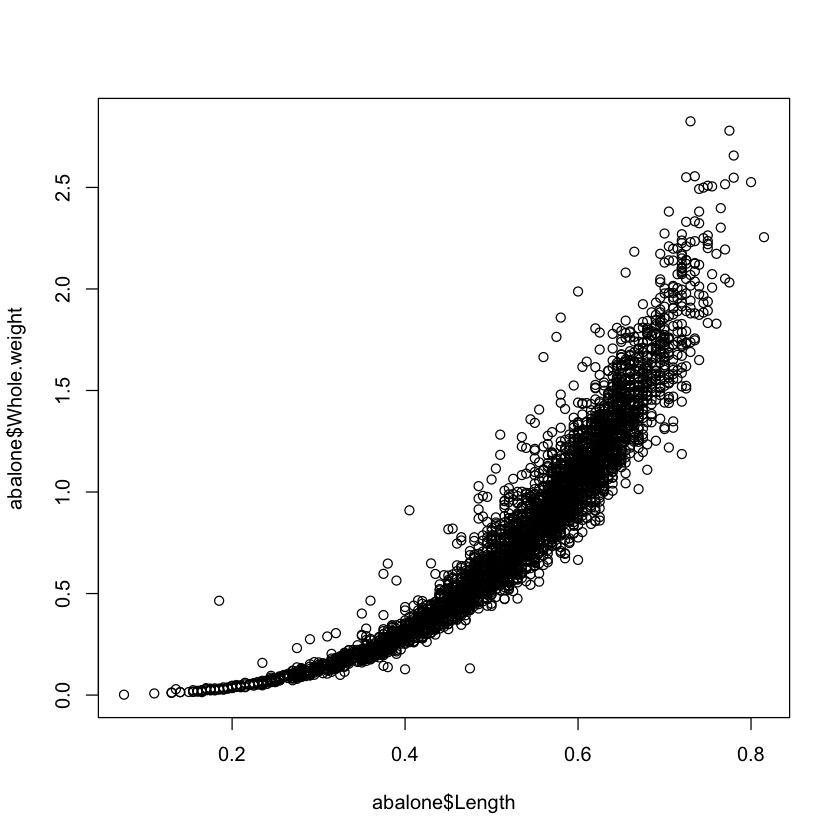

In [34]:
plot(abalone$Length, abalone$Whole.weight)

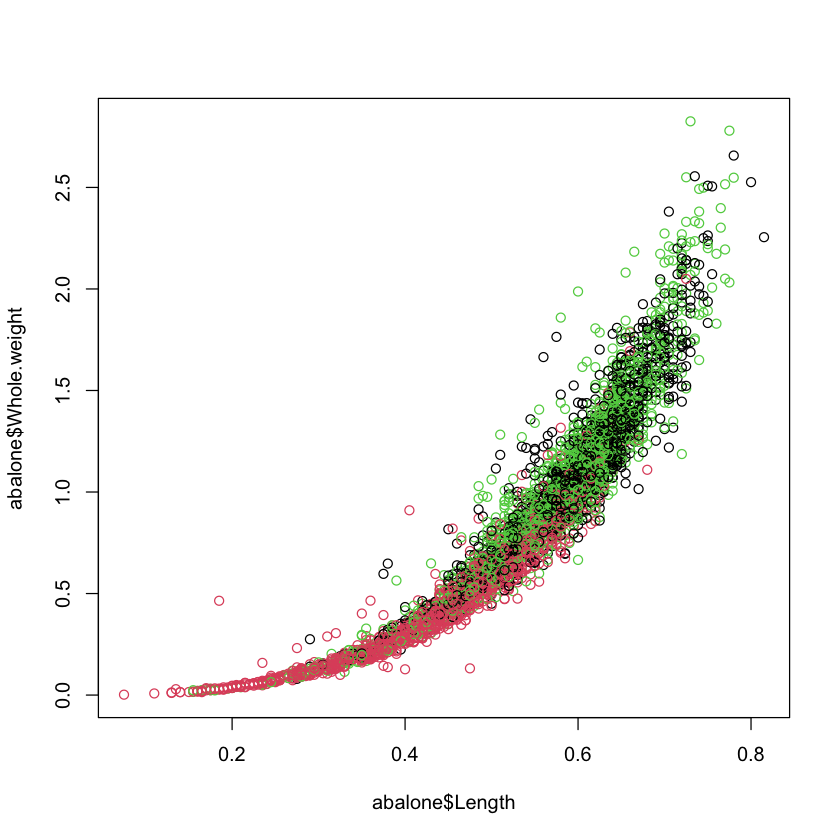

In [35]:
plot(abalone$Length, abalone$Whole.weight, col = abalone$Sex)

Note that you cannot color on a column of categorical data if it is not a factor because each entry is considered unique, there are no shared characteristics between the observations.

It can be confusing to figure out which color corresponds to which category in base R.

In [36]:
class(abalone$Sex)
levels(abalone$Sex)

[1] "factor"

[1] "F" "I" "M"

Let's make a table to specify the color we want each level to be

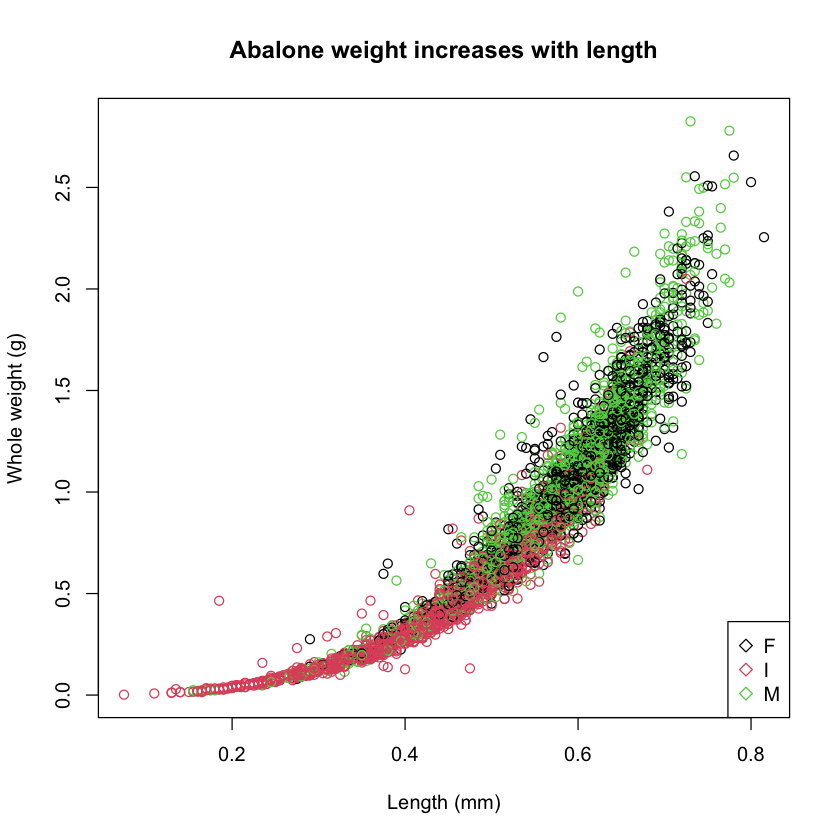

In [37]:
plot(abalone$Length, abalone$Whole.weight, col=abalone$Sex,
     main = "Abalone weight increases with length",
     xlab = "Length (mm)",
     ylab = "Whole weight (g)")

legend(x="bottomright",
       legend = levels(abalone$Sex),
       col = 1:3,
       pch = 5
       )

Base R plots use layers so the base `plot()` must be created first, before the `legend()` layer is added on top.

I stands for infant so it makes sense that they would be smaller in weight and length compared to the mature abalone.

Before we move on to the next type of plot, let's customize it a bit more by cleaning up the axis

## Scatterplot with ggplot

`ggplot()` was created to support customizable and reproducible plots. The way that the `ggplot()` function accepts the data is much different from the base R `plot()` function.

The both columns of data must be in the same dataframe and specified in the *data* parameter. Then, the x and y axis must be specified using the aesthetic *aes* parameter. The base `ggplot()` call only holds the data, the geometry or format of the plot must be further specified by a separate call.

While commas `,` separate the parameters in a function, plus signs `+` are used to specify different layers of the plot.

This is the basic template for ggplots:

> ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +  <GEOM_FUNCTION>()

In [38]:
library(ggplot2)

A single continuous variable can be displayed using a histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 4177

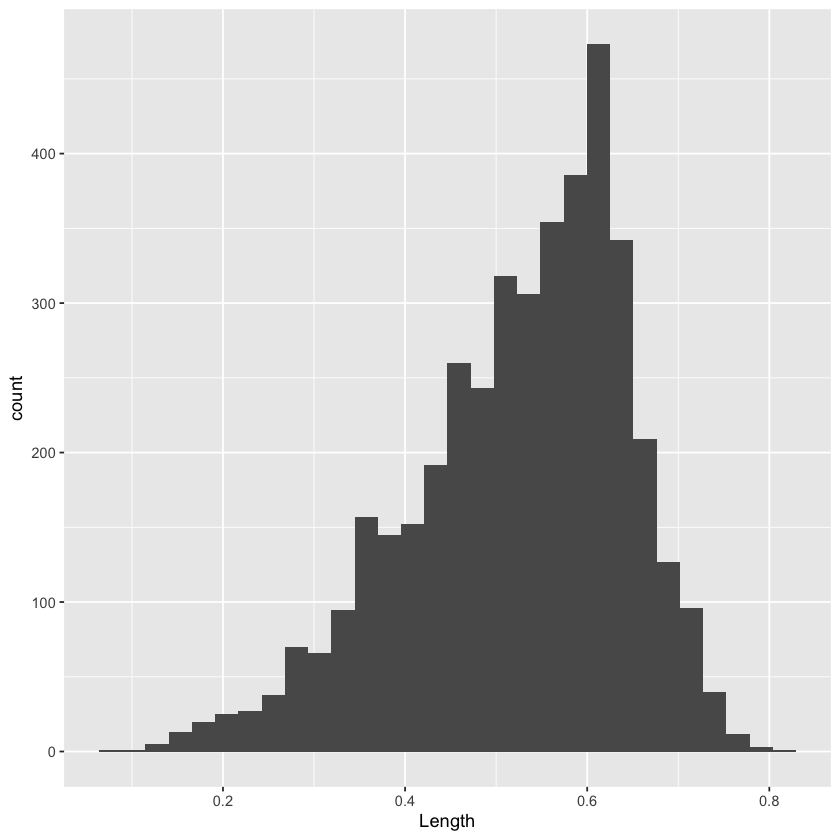

In [39]:
ggplot(data = abalone, mapping = aes(x=Length)) +
  geom_histogram()

nrow(abalone)

Two continuous variables can be contrasted using a point or scatter plot.

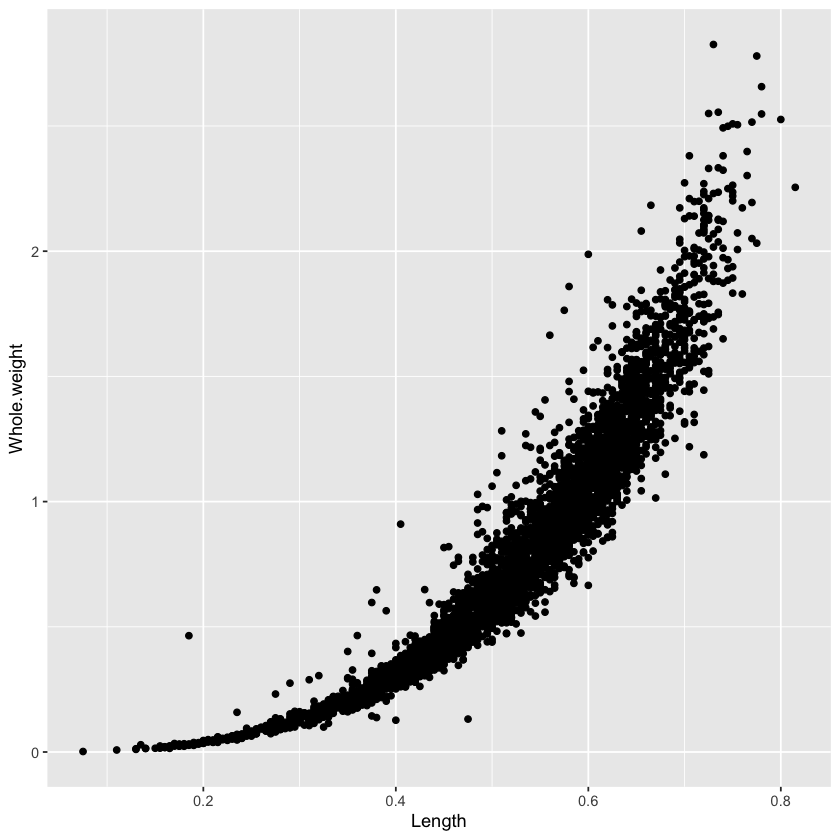

In [40]:
ggplot(abalone, aes(x = Length, y = Whole.weight)) +
  geom_point()

It is a lot simpler to add color to ggplots

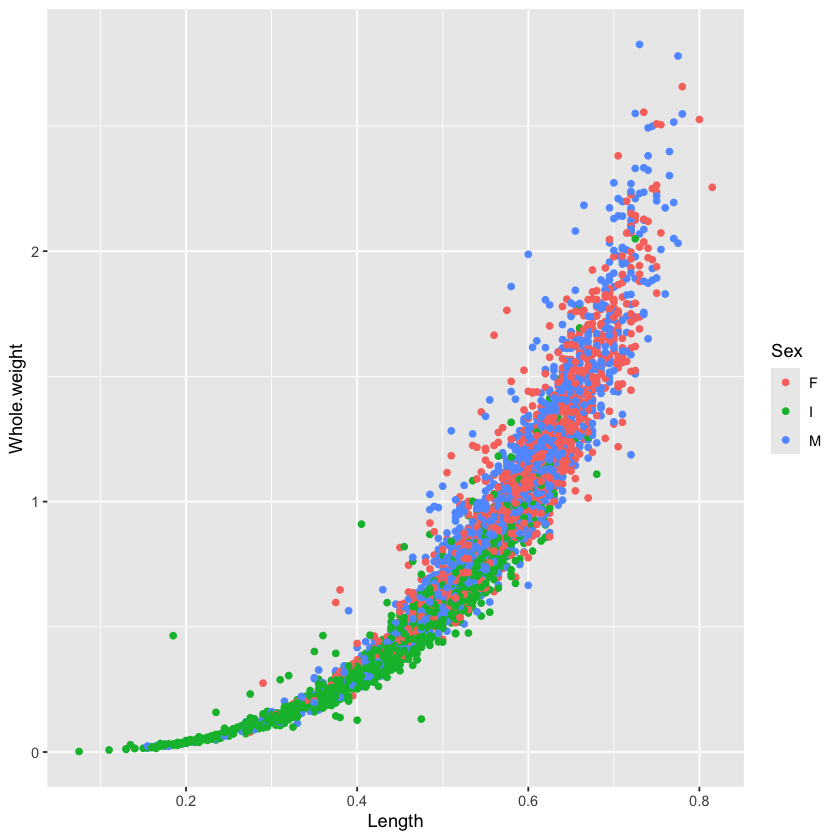

In [41]:
ggplot(abalone, aes(x = Length, y = Whole.weight, col = Sex)) +
  geom_point()

There's a lot of dots that are piling up on top of each other so we can change the alpha value to modify the transparency. Remember, you can always look up more information about each function using the `?` or looking online! No need to memorize everything!

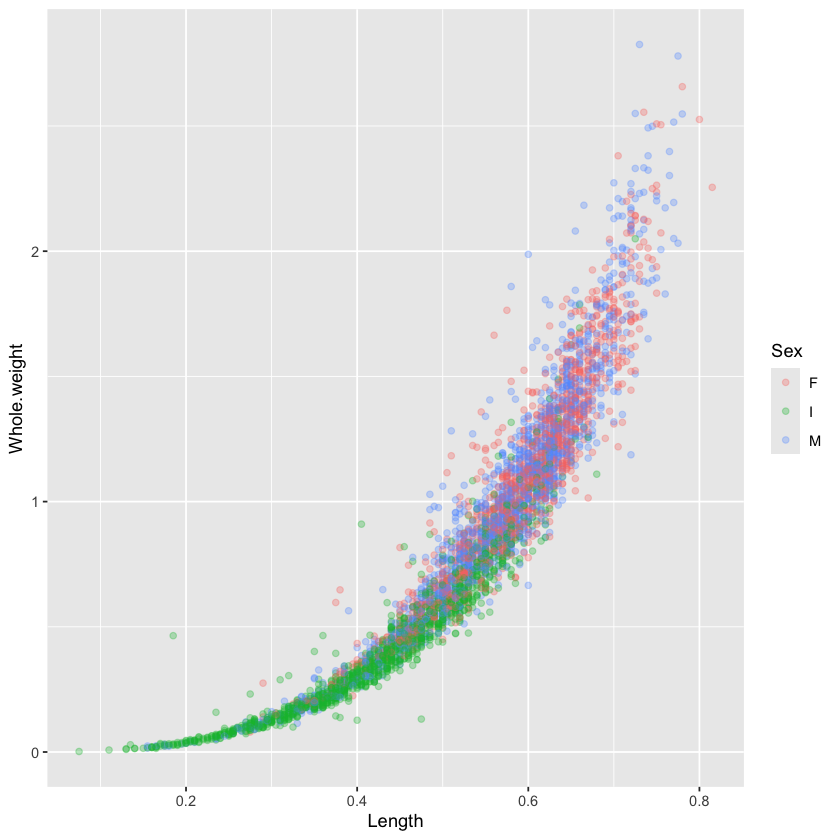

In [42]:
ggplot(abalone, aes(x = Length, y = Whole.weight, col = Sex)) +
  geom_point(alpha = 0.3)

## Exercise

Create a plot to investigate the relationship between the shucked weight and the shell weight of ONLY adult abalone (exclude the infant abalones). Color the plot by Sex, do you notice any difference between the two?

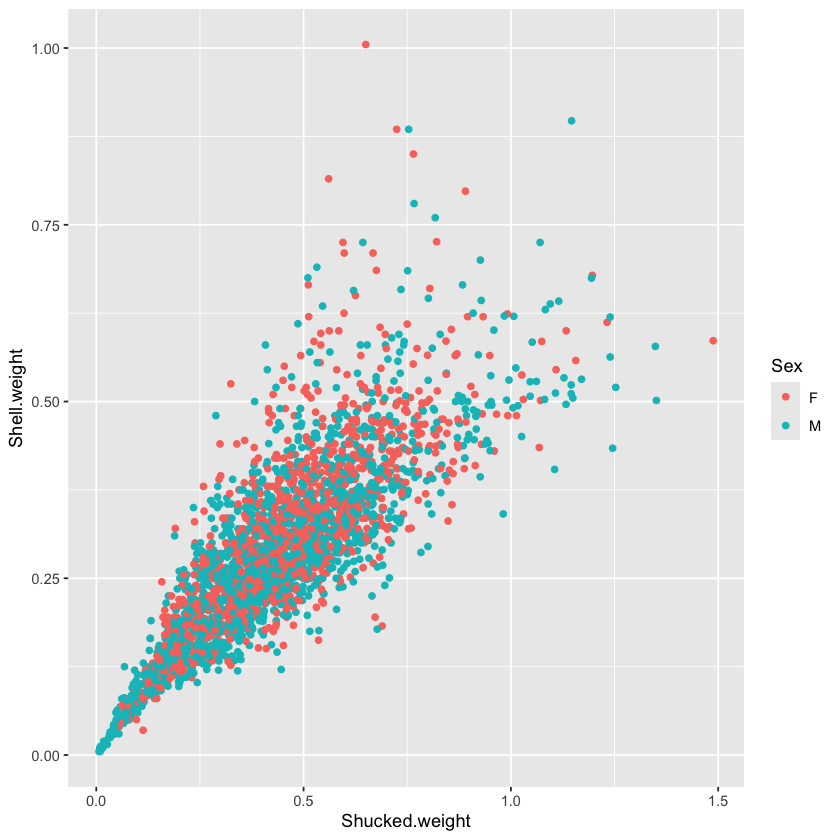

In [43]:
abalone_MF <- abalone[abalone$Sex %in% c("M", "F"), ]

ggplot(abalone_MF, aes(x=Shucked.weight, y = Shell.weight, col = Sex)) +
  geom_point()

Let's take a closer look at categorical data. One categorical data can be displayed with a bar plot. This is helpful when we are looking to see if we have equal representation in each of the sample groups.

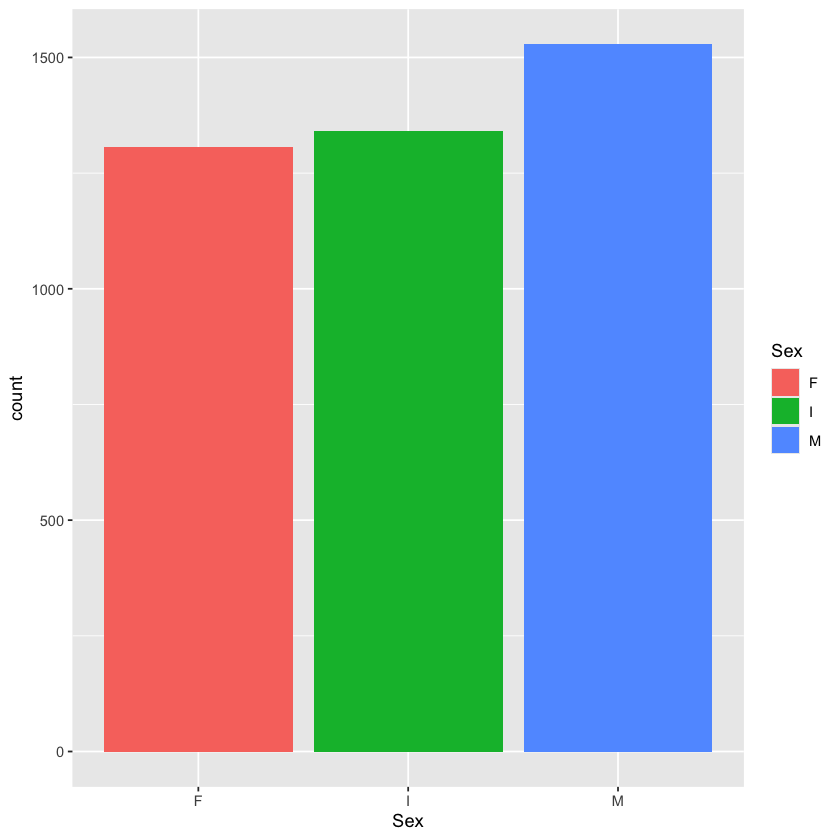

In [44]:
ggplot(abalone, aes(x= Sex, fill = Sex)) +
  geom_bar()

Bar plots can also be easily modified.

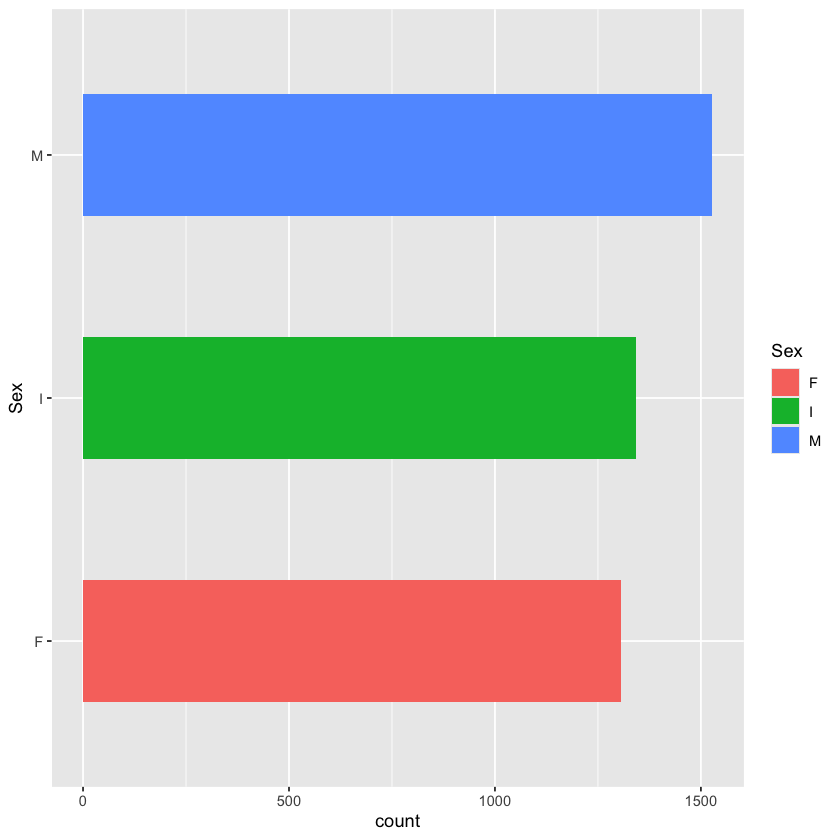

In [45]:
ggplot(abalone, aes(x= Sex, fill = Sex)) +
  geom_bar(width = 0.5) +
  coord_flip()

Lastly, boxplots are used to describe the relationship between a continuous and a categorical variable.

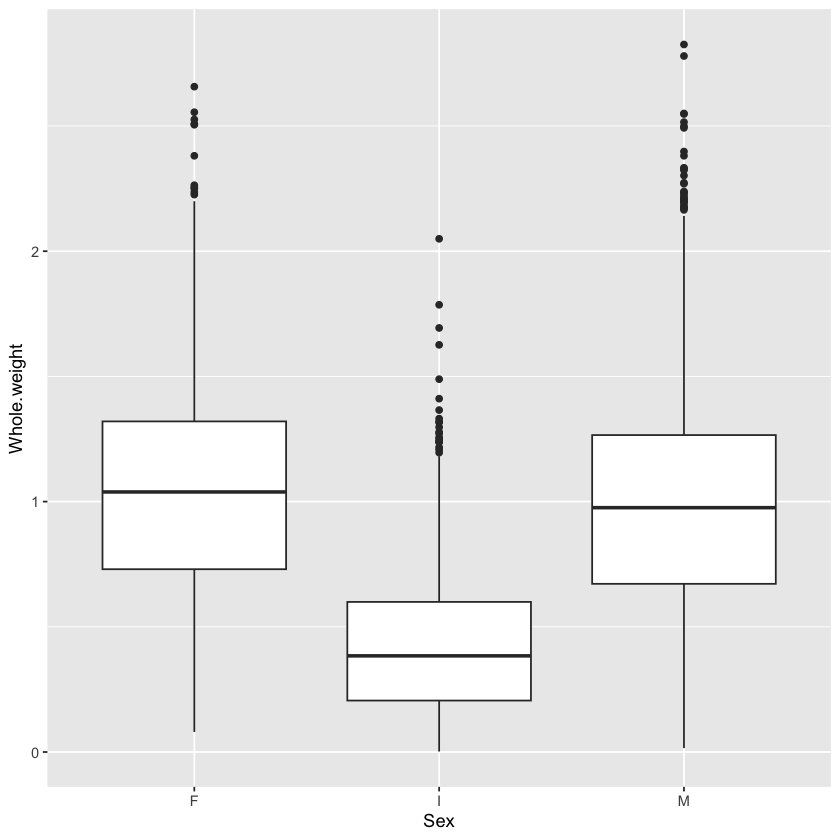

In [46]:
ggplot(abalone, aes(x = Sex, y = Whole.weight)) +
  geom_boxplot()

This more clearly shows that the weight distribution is comparable between the males and females. However, it would be clearer to have the F and M bars adjacent for comparison.

[1] "F" "I" "M"

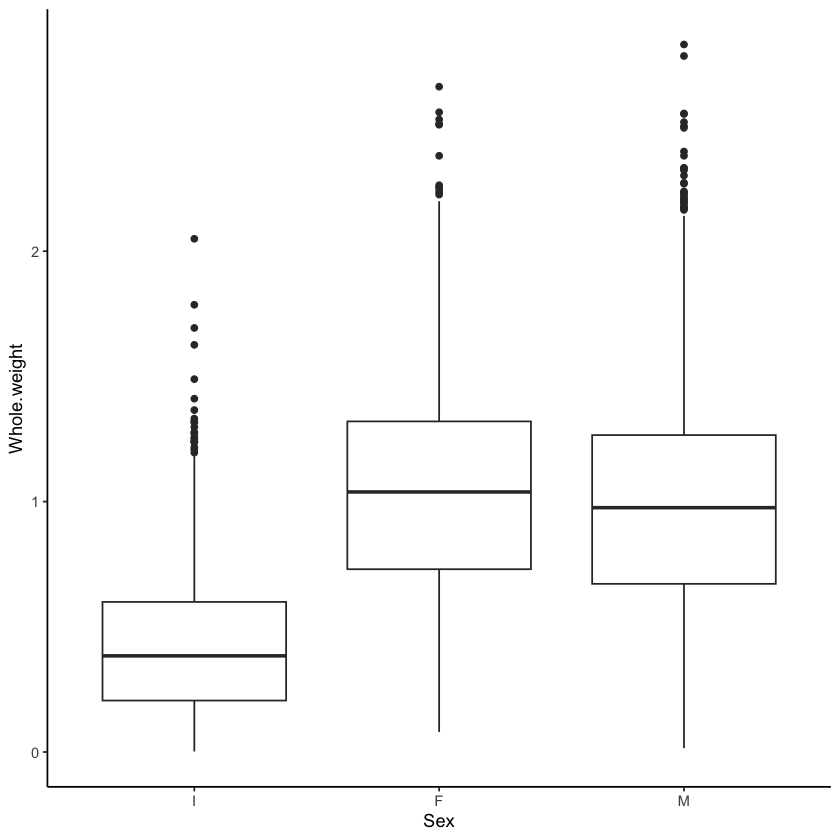

In [47]:
levels(abalone$Sex)

abalone$Sex <- factor(abalone$Sex, levels = c("I", "F", "M"))

ggplot(abalone, aes(x = Sex, y = Whole.weight)) +
  geom_boxplot() +
  theme_classic()

## Multi-panel plots with ggplot

Plots can be saved as objects

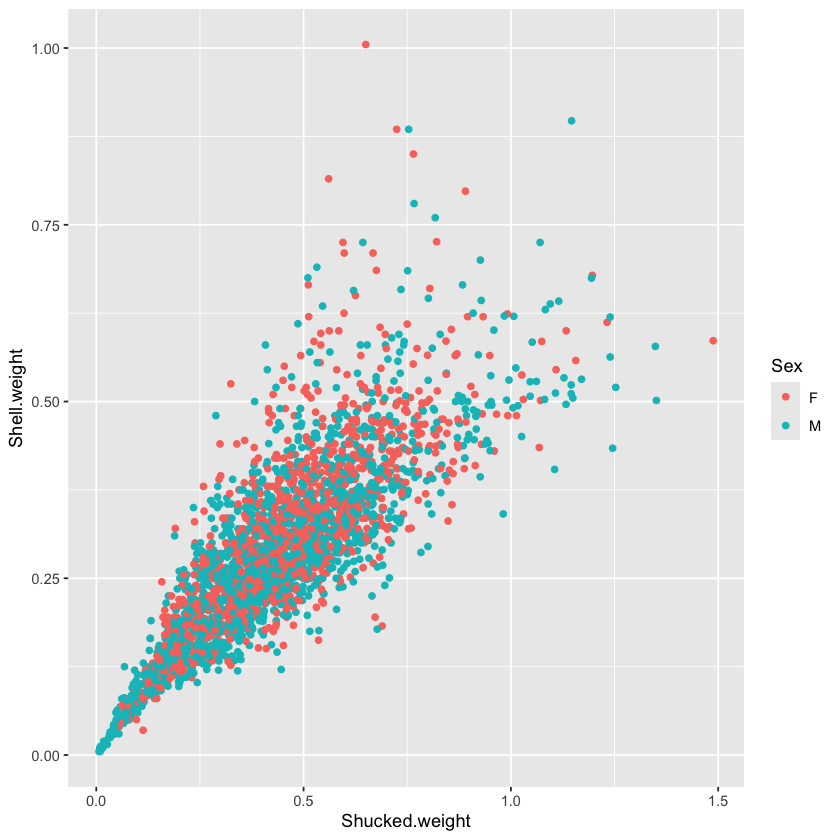

In [48]:
p1 <- ggplot(abalone_MF, aes(x=Shucked.weight, y = Shell.weight, col = Sex)) +
  geom_point()

p2 <- ggplot(abalone, aes(x = Sex, y = Whole.weight)) +
  geom_boxplot() +
  theme_classic()

p1

Rather than flipping between separating plots and stitching them together afterwards in a photo editor, we can arrange them into a figure panel all together in R


Attaching package: ‘cowplot’




The following object is masked from ‘package:lubridate’:

    stamp




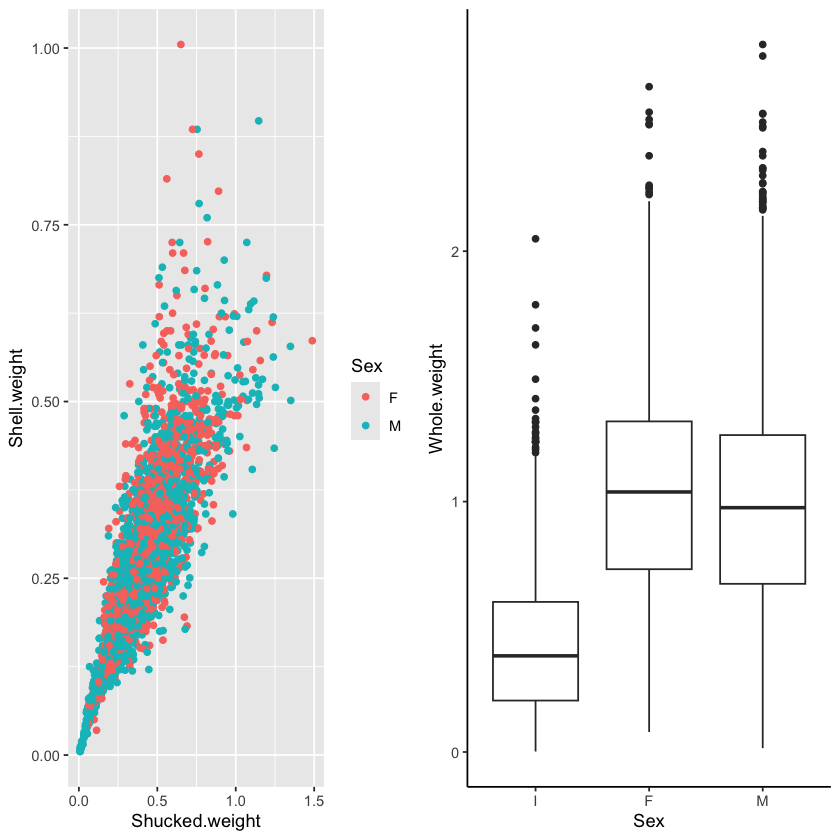

In [49]:
#install.packages("cowplot")
library(cowplot)

plot_grid(p1, p2)

Let's clean this up a bit

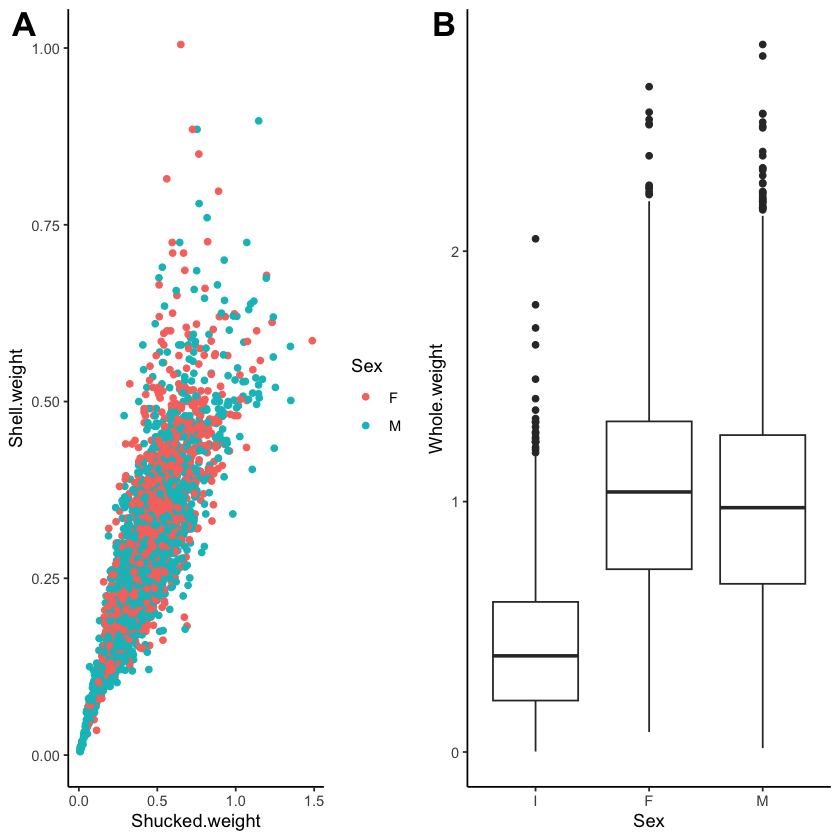

In [50]:
top_row <- plot_grid(p1 + theme_classic(),
          p2,
          labels = c("A", "B"),
          label_size = 20)

top_row

Adding a third plot to play around with the distribution between panels

We want p1 to be larger by itself in the top row and then p2 and p3 split in the bottom row.

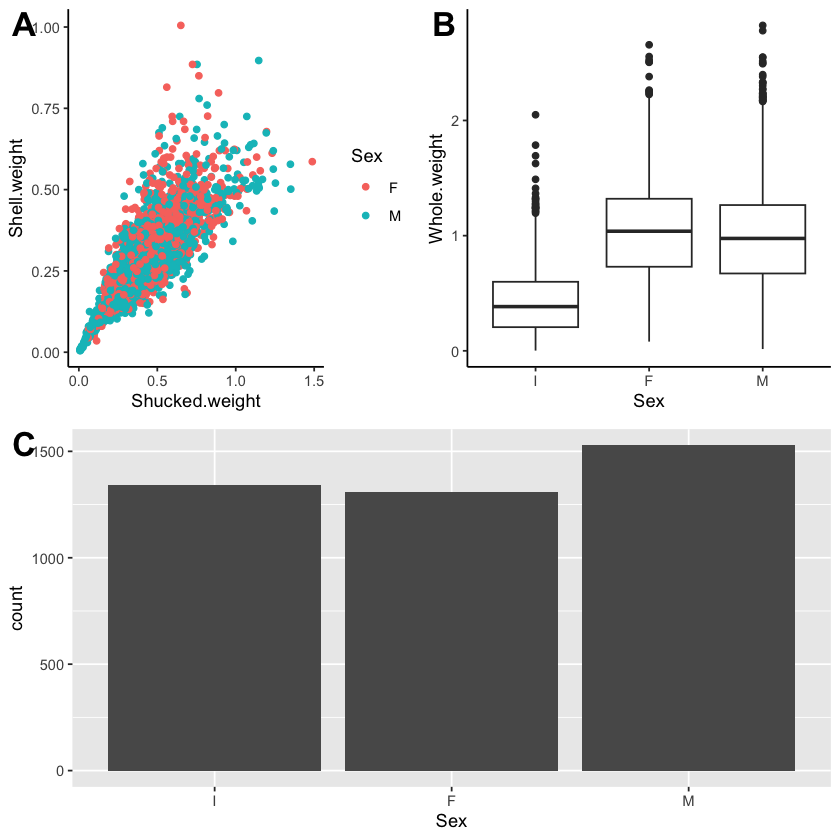

In [51]:
p3 <- ggplot(abalone, aes(Sex)) + geom_bar()

plot_grid(top_row, p3, ncol=1,
          labels = c("", "C"),
          label_size = 20)

## Exporting plots

In [52]:
getwd()

[1] "/Users/jqiu/Documents/CBWgithub/cbw-dev-test-pages/jupyter-book/INR-2024-Recreate-JB"

In [53]:
# ok originally this was png(file = "./INR_fig1.png", bg = "transparent"), but I don't think we should have random images in the main folders, so we should tell
# instructors to make any produced files go to a specific directory
png(file = "./images/INR_fig1.png", bg = "transparent")
top_row
dev.off()

pdf 
  2

## Day 1 Project

For this mini guided project, we will be working with a dataset quantifying water quality that is publicly available at: https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download

Here is some description of the data:

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.
Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies. More information about each of the columns can be found in the link above

pH value
Hardness
Solids (Total dissolved solids - TDS)
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity
Potability

Insert a code chunk underneath each step to carry out the instruction.

1. Read in the "water_potability.csv" data into an object called data Check the object you created by printing out the first 10 rows and applying the summary function.

2. Notice that the pH column contains a couple hundred NA values. NA are special values in R (like how "pi" is preset to a value of 3.14159...) to indicate that there is missing data, or it is not available. There are also some NAs in the Sulfate and Trihalomethanes columns.

Create new object called water_df that only contains complete observations.

Hint: take a look at the function called `na.omit()`. In most cases, someone's already done what you've wanted to do so there may already be code or functions that you can adapt and use!

3. The Potability column has two possible values: 1 means Potable and 0 means Not potable.

It is read in by default as a character vector. Convert this column to a factor.

4. WHO has recommended maximum permissible limit of pH in drinking water from 6.5 to 8.5.

Create a new column within the `water_df` object called `ph_category` in which:

- Observations with a pH less than 6.5 have a value of `acidic` in the `ph_category`
- Observations with a pH betwee 6.5 - 8.5 have a value of `permissible` in the `ph_category`
- Observations with a pH greater than 8.5 have a value of `basic` in the `ph_category`

There are multiple ways to do this, give it a go! You can't break the object - if you ever feel like you need a reset, you can always repeat step 1 to read in the object again.

Use `table()` or `summary()` to check the values in the `ph_category` column

5. Create a plot to double check if the annotations in the `ph_category` column were applied correctly. Make sure to represent both the `ph` and `ph_category` columns.

You're welcome to use base R or ggplot functions. There are multiple ways of representing these two columns. ggplot is slightly preferred because of its increased customization so it's good to get some practice with it!

6. The levels of sulfates and water hardness cause by salts should be minimized in order to be safe for consumption.

Create a plot with the level of water hardness on the x axis and sulphate on the y axis colored by the Potability column.

Try applying the `facet_grid()` layer to the plot in order to group the plots by a factor. Make sure to use the `~` before the column name!

(Note - the data is quite messy so don't worry if the results do not separate as much as you would like - real data is messy!)